In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sqlite3
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
import time


In [2]:
import re
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag, ne_chunk
from wordcloud import WordCloud


from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.stem.wordnet import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS


In [3]:
import pandas as pd # package for high-performance, easy-to-use data structures and data analysis
import numpy as np # fundamental package for scientific computing with Python
from pandas import Series

import matplotlib
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()
from plotly import tools
#from mpl_toolkits.basemap import Basemap
from numpy import array
from matplotlib import cm

# import cufflinks and offline mode

from wordcloud import WordCloud, STOPWORDS
from scipy.misc import imread
import base64

from sklearn import preprocessing
# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")




In [73]:
import plotly as py

import plotly.io as pio

pio.renderers

pio.renderers.default = "svg"

In [4]:
from sqlalchemy import create_engine
#engine = create_engine('sqlite://', echo=False)
#engine = create_engine('sqlite:////Users/monikabagyal/Google_drive_minsifye/Courses/Spring2020/InnovationAnalytics/GroupProject/', echo=False)

sql_engine = create_engine('sqlite:///test.db', echo=False)
connection = sql_engine.raw_connection()


In [5]:
skytrax = pd.read_excel("skytrax.xlsx")
skytrax.head()

airline  overall               author   review_date  \
0               NaN      NaN                  NaN           NaN   
1  Turkish Airlines      7.0  Christopher Hackley  8th May 2019   
2               NaN      NaN                  NaN           NaN   
3  Turkish Airlines      2.0        Adriana Pisoi  7th May 2019   
4               NaN      NaN                  NaN           NaN   

                                     customer_review aircraft  traveller_type  \
0                                                NaN      NaN             NaN   
1  âœ… Trip Verified | London to Izmir via Istanb...      NaN        Business   
2                                                NaN      NaN             NaN   
3  âœ… Trip Verified | Istanbul to Bucharest. We ...      NaN  Family Leisure   
4                                                NaN      NaN             NaN   

           cabin                         route date_flown  seat_comfort  \
0            NaN                           NaN        NaT           NaN   
1  Economy Class  London to Izmir via Istanbul 2019-05-01           4.0   
2            NaN                           NaN        NaT           NaN   
3  Economy Class         Istanbul to Bucharest 2019-05-01           4.0   
4            NaN                           NaN        NaT           NaN   

   cabin_service  food_bev  entertainment  ground_service  value_for_money  \
0            NaN       NaN            NaN             NaN              NaN   
1            5.0       4.0            4.0             2.0              4.0   
2            NaN       NaN            NaN             NaN              NaN   
3            1.0       1.0            1.0             1.0              1.0   
4            NaN       NaN            NaN             NaN              NaN   

  recommended  
0         NaN  
1         yes  
2         NaN  
3          no  
4         NaN

### Working with only US Domestic Airlines

In [6]:
skytrax = skytrax[skytrax['airline'].isin(['American Airlines', 'Delta Air Lines', 'Southwest Airlines', 'United Airlines','Jetblue Airways', 'Frontier Airlines', 'Spirit Airlines'])]
skytrax.reset_index(inplace=True)
skytrax.drop('index', inplace=True, axis=1)
#skytrax.head()

print("Total rows:",skytrax.shape[0])
skytrax.airline.value_counts()

Total rows: 13359


Spirit Airlines       2934
American Airlines     2867
United Airlines       2829
Frontier Airlines     1624
Delta Air Lines       1547
Southwest Airlines     913
Jetblue Airways        645
Name: airline, dtype: int64

In [7]:
def draw_barchart(var_x,var_y,var_xticks, var_yticks, var_title, var_filename, var_color, var_opacity):
    trace = go.Bar(
        x = var_x,
        y = var_y,
        marker=dict(
            color = (var_color),           
            reversescale = True
        ), opacity=var_opacity
    )
    data = [trace]
    layout = go.Layout(
        title = var_title,
        xaxis=dict(
            title=var_xticks,
            tickfont=dict(
                size=11
                ,color='rgb(107, 107, 107)'
            )
        ),
        yaxis=dict(
            title=var_yticks,
            titlefont=dict(
                size=16,
                color='rgb(107, 107, 107)'
            ),
            tickfont=dict(
                size=14
                ,color='rgb(107, 107, 107)'
            )
    )
    )
    fig = go.Figure(data=data, layout=layout)
    py.offline.iplot(fig, filename=var_filename)

# Total Customer Reviews Count for Each Airline

In [8]:
#skytrax.airline.value_counts().plot(kind='barh', title='Total Customer Reviews per airline', figsize=(10,6), color='orange');
#plt.xlabel('Reviews')
#plt.ylabel('Airline');
#plt.savefig('plot1.png', bbox_inches = 'tight');

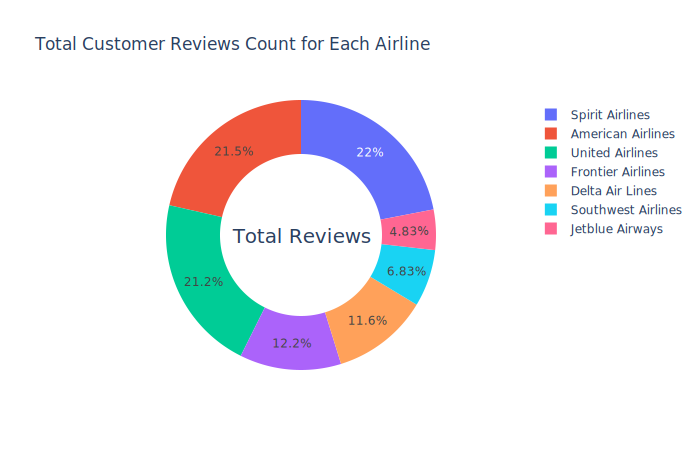

In [77]:
temp = skytrax['airline'].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
  
fig = {
  "data": [
    {
      "values": df['values'],
      "labels": df['labels'],
      "domain": {"column": 0},
      "hoverinfo":"label+value",
      "hole": .6,
      "type": "pie"
    }],
  "layout": {
        "title":"Total Customer Reviews Count for Each Airline",
        "grid": {"rows": 1, "columns": 1},
        "annotations": [
            {
                "font": {"size": 20},
                "showarrow": False,
                "text": "Total Reviews",
                "x": 0.5,
                "y": 0.5
            }
        ]
    }
}
py.offline.iplot(fig, filename='reviews_counts_ring.png')

### Percentage of missing values per column 

In [13]:
np.sum(skytrax.isnull())/skytrax.shape[0]

airline            0.000000
overall            0.028071
author             0.000000
review_date        0.000000
customer_review    0.000000
aircraft           0.833820
traveller_type     0.277117
cabin              0.094768
route              0.277940
date_flown         0.278838
seat_comfort       0.062205
cabin_service      0.059361
food_bev           0.299948
entertainment      0.413504
ground_service     0.283180
value_for_money    0.027397
recommended        0.023804
dtype: float64

In [14]:
#color=['#FF3E96','#00E5EE','#FFF8DC','#68228B','#1E90FF','#FFC125','#FF6103','#8EE5EE','#458B00','#FFF8DC'],
df = pd.DataFrame(np.sum(skytrax.isnull())/skytrax.shape[0])
df = df.reset_index()
df.columns = ['labels', 'values']
df = df[df['values'] > 0]
df['values'] = df['values']*100

var_title = "Percentage of Missing Values in each feature(%) "
var_x = df['labels']
var_y = df['values']
var_xticks='Airlines'
var_yticks='Missing Percentage in %'
var_filename='missing_values'
var_color='green'
var_opacity = 0.8
draw_barchart(var_x,var_y,var_xticks, var_yticks, var_title, var_filename, var_color, var_opacity)

## Dropping Aircraft and Route column

In [15]:
skytrax = skytrax[['airline', 'overall', 'author', 'review_date', 'customer_review',
       'traveller_type', 'cabin', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended']]
# Keeping a copy of skytrax dataset in case needed later
old_skytrax = skytrax.copy()

In [16]:
skytrax.corr().head(1).transpose()

overall
overall          1.000000
seat_comfort     0.769009
cabin_service    0.776472
food_bev         0.770991
entertainment    0.688824
ground_service   0.861872
value_for_money  0.908409

# Handling Missing Values
### Replacing Missing Column Values with Mean() value of a row.
    seat_comfort	
    cabin_service	
    food_bev	
    entertainment	
    ground_service	
    value_for_money	

In [17]:
skytrax[['seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money']] = skytrax[['seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money']].apply(lambda row: row.fillna(row.mean()), axis=1)

skytrax[['seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money']] = skytrax[['seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money']].apply(lambda row: row.fillna(0), axis=1)

skytrax[['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money']] = skytrax[['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money']].apply(lambda row: row.fillna(row.mean()), axis=1)

# Let's check percentage of missing value in dataset
(np.sum(skytrax.isnull())/skytrax.shape[0])*100

airline             0.000000
overall             0.000000
author              0.000000
review_date         0.000000
customer_review     0.000000
traveller_type     27.711655
cabin               9.476757
date_flown         27.883824
seat_comfort        0.000000
cabin_service       0.000000
food_bev            0.000000
entertainment       0.000000
ground_service      0.000000
value_for_money     0.000000
recommended         2.380418
dtype: float64

## Let's look in to one data row with some NuLL values

In [18]:
# Index 25 has been identified for this task
# Index 25 has Null value for cabin data
print(skytrax.ix[25].customer_review)
skytrax.ix[25]

âœ… Trip Verified | Cancun to Milan via Miami. We were six counting a handicap person and an infant (2 years). Our flight took off delayed of one hour from Cancun, when we finally arrived in MIA we had only about 1 hour to the connection. So then the 1st soap opera began, no one came to take my stepfather (the handicap) at the plane, after 10 min some one came and left him at a place with others, then the lady from AA said we should reschedule our flight home for the other day, after a brief discussion she called someone and he and my mother went one way and my sister, niece and brother in law in another. We used the APC (Automated Passport Control) and went to the line, or should i say lines, i went one way. then security control. We all met after SC and went to the gate, there the second soap opera began. apparently some battery had to be changed and after multiple delays, emails, and texts and about 3 hours waiting later they decided to change the airplane, so we had to change gates

airline                                            American Airlines
overall                                                            1
author                                    Luis Eduardo Vieira mendes
review_date                                          28th April 2019
customer_review    âœ… Trip Verified | Cancun to Milan via Miami....
traveller_type                                                   NaN
cabin                                                            NaN
date_flown                                                       NaT
seat_comfort                                                       0
cabin_service                                                      0
food_bev                                                           0
entertainment                                                      0
ground_service                                                     0
value_for_money                                                    0
recommended                       

In [19]:
# Possible values in traveller_type column
print(skytrax['traveller_type'].value_counts())
# Possible values in traveller_type column
print('\n',skytrax['cabin'].value_counts())
# Possible values in recommended column
print('\n',skytrax['recommended'].value_counts())

Solo Leisure      3229
Couple Leisure    2431
Family Leisure    2321
Business          1676
Name: traveller_type, dtype: int64

 Economy Class      10341
Business Class       656
Premium Economy      549
First Class          547
Name: cabin, dtype: int64

 no     9871
yes    3170
Name: recommended, dtype: int64


In [20]:
# Date type
skytrax['review_date'].head(5)

0    11th May 2019
1    10th May 2019
2    10th May 2019
3     9th May 2019
4     8th May 2019
Name: review_date, dtype: object

In [21]:
# splitting review_date column to get month and year value in separate columns
ignore, skytrax['review_month'], skytrax['review_year'] = skytrax['review_date'].str.split(' ').str

look_up = {'January': 1, 'February':2, 'March':3, 'April':4, 'May':5,
            'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}

skytrax['review_month'] = skytrax['review_month'].apply(lambda x: look_up[x])

# Changing datatype of review_year column
skytrax['review_year'] = skytrax['review_year'].apply(lambda x:int(x))



In [22]:
skytrax = skytrax[['airline', 'overall', 'customer_review',
       'traveller_type', 'cabin', 'seat_comfort',
       'cabin_service', 'food_bev', 'entertainment', 'ground_service',
       'value_for_money', 'recommended', 'review_month', 'review_year']]
skytrax = skytrax.fillna('Null')

# Average rating for US Domestic Airline

In [23]:
sky_mean = skytrax[['airline', 'overall']].groupby('airline').mean()
sky_mean.columns = ['Avg_Rating']
sky_mean = sky_mean.sort_values('Avg_Rating')
#sky_mean.plot(kind='barh', title='Average Ratings per Airline', figsize=(10,6), color='orange');
#plt.xlabel('Ratings')
#plt.ylabel('Airline');
sky_mean


Avg_Rating
airline                       
Frontier Airlines     2.298327
Spirit Airlines       2.607277
American Airlines     2.896843
United Airlines       3.028279
Delta Air Lines       4.536436
Jetblue Airways       4.926253
Southwest Airlines    5.065991

In [24]:
var_title = "US Airlines Average Ratings Out of 10 "
var_x = sky_mean.index
var_y = sky_mean.Avg_Rating
var_xticks='Airline'
var_yticks='Rating'
var_filename='avg_rating1'
var_color='blue'
var_opacity = 0.4
draw_barchart(var_x,var_y,var_xticks, var_yticks, var_title, var_filename, var_color, var_opacity)

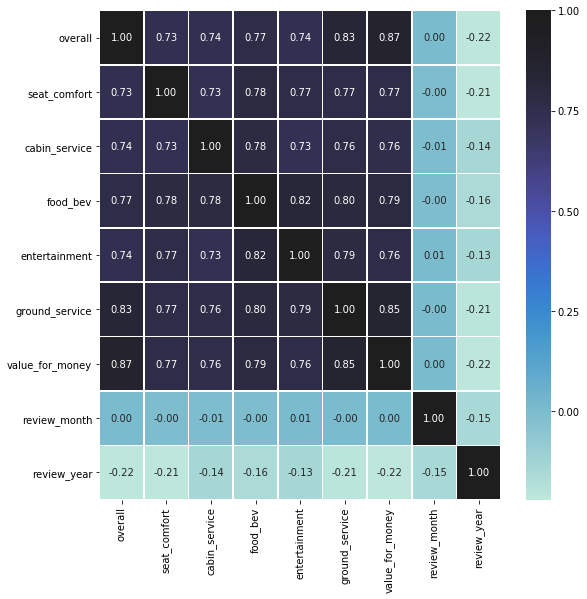

In [25]:
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(skytrax.corr(), annot=True, fmt='.2f', center=True, linewidths=.5, ax=ax);


In [26]:
skytrax.describe()

overall  seat_comfort  cabin_service      food_bev  entertainment  \
count  13359.000000  13359.000000   13359.000000  13359.000000   13359.000000   
mean       3.224420      2.154421       2.378309      2.009423       2.037333   
std        3.227973      1.404589       1.564284      1.360926       1.420619   
min        0.000000      0.000000       0.000000      0.000000       0.000000   
25%        1.000000      1.000000       1.000000      1.000000       1.000000   
50%        1.000000      2.000000       2.000000      1.000000       1.000000   
75%        5.000000      3.000000       4.000000      3.000000       3.000000   
max       10.000000      5.000000       5.000000      5.000000       5.000000   

       ground_service  value_for_money  review_month   review_year  
count    13359.000000     13359.000000  13359.000000  13359.000000  
mean         2.043731         2.063989      6.382065   2016.263942  
std          1.451273         1.521475      3.357431      1.830220  
min          0.000000         0.000000      1.000000   2010.000000  
25%          1.000000         1.000000      4.000000   2015.000000  
50%          1.000000         1.000000      6.000000   2016.000000  
75%          3.000000         3.000000      9.000000   2018.000000  
max          5.000000         5.000000     12.000000   2019.000000

In [27]:
skytrax_modified = pd.get_dummies(skytrax.drop(['customer_review', 'airline'], axis=1))

In [28]:
skytrax_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13359 entries, 0 to 13358
Data columns (total 22 columns):
overall                          13359 non-null float64
seat_comfort                     13359 non-null float64
cabin_service                    13359 non-null float64
food_bev                         13359 non-null float64
entertainment                    13359 non-null float64
ground_service                   13359 non-null float64
value_for_money                  13359 non-null float64
review_month                     13359 non-null int64
review_year                      13359 non-null int64
traveller_type_Business          13359 non-null uint8
traveller_type_Couple Leisure    13359 non-null uint8
traveller_type_Family Leisure    13359 non-null uint8
traveller_type_Null              13359 non-null uint8
traveller_type_Solo Leisure      13359 non-null uint8
cabin_Business Class             13359 non-null uint8
cabin_Economy Class              13359 non-null uint8
cabin_First C

# Let's Predict Recommended column's 2.3% Missing values based on other columns: Random Forest Classifier

In [29]:
df_train = skytrax_modified[skytrax_modified['recommended_Null'] == 0]
df_test = skytrax_modified[skytrax_modified['recommended_Null'] == 1]

In [30]:
df_train.corr().head(1).transpose()

overall
overall                        1.000000
seat_comfort                   0.764898
cabin_service                  0.773906
food_bev                       0.796085
entertainment                  0.766282
ground_service                 0.865788
value_for_money                0.902727
review_month                   0.000996
review_year                   -0.219770
traveller_type_Business       -0.062490
traveller_type_Couple Leisure -0.062688
traveller_type_Family Leisure -0.042068
traveller_type_Null            0.155614
traveller_type_Solo Leisure   -0.015748
cabin_Business Class           0.145682
cabin_Economy Class           -0.179318
cabin_First Class              0.107252
cabin_Null                     0.047461
cabin_Premium Economy          0.034822
recommended_Null                    NaN
recommended_no                -0.918131
recommended_yes                0.918131

### Splitting Dataset into training and testing sets.

In [31]:
X = df_train.drop(['review_year', 'review_month','recommended_Null', 'recommended_no', 'cabin_Null', 'traveller_type_Null', 'recommended_yes'], axis=1)
y = df_train['recommended_yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


### Logistic Regression 

In [32]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98      1962
          1       0.95      0.94      0.94       647

avg / total       0.97      0.97      0.97      2609

[[1928   34]
 [  42  605]]


### Random Forest Classifier

In [33]:

rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))



             precision    recall  f1-score   support

          0       0.98      0.98      0.98      1962
          1       0.95      0.93      0.94       647

avg / total       0.97      0.97      0.97      2609

[[1928   34]
 [  45  602]]


### both models perform similar, let's choose logistic regression model

In [34]:
X_prod = df_test.drop(['review_year', 'review_month', 'recommended_Null', 'recommended_no', 'cabin_Null', 'traveller_type_Null', 'recommended_yes'], axis=1)
recommended_category = logmodel.predict(X_prod)

recommended_category


array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### As few values of recommended column got prediction as 1, we need to make changes to final recommend column. Only recommended_yes column will be considered to see if reviewers recommend the airline or not.

In [35]:
counter = 0
skytrax_modified['Recom'] = 0
start = time.process_time()
for index_point in df_test.index.base:
    #print(index_point)
    skytrax_modified['Recom'].iat[index_point] = recommended_category[counter]
    counter +=1
    

timeTaken = time.process_time() - start
print('timeTaken:',timeTaken)



timeTaken: 0.003175000000005923


In [36]:
skytrax_modified['recommended'] = skytrax_modified['recommended_yes'] + skytrax_modified['Recom']

In [37]:
skytrax_modified.columns

Index(['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'review_month', 'review_year',
       'traveller_type_Business', 'traveller_type_Couple Leisure',
       'traveller_type_Family Leisure', 'traveller_type_Null',
       'traveller_type_Solo Leisure', 'cabin_Business Class',
       'cabin_Economy Class', 'cabin_First Class', 'cabin_Null',
       'cabin_Premium Economy', 'recommended_Null', 'recommended_no',
       'recommended_yes', 'Recom', 'recommended'],
      dtype='object')

In [38]:
skytrax_modified = skytrax_modified.drop(['recommended_Null', 'recommended_no', 'recommended_yes', 'Recom','cabin_Null', 'traveller_type_Null'], axis=1)


In [39]:
skytrax_modified.head()

overall  seat_comfort  cabin_service  food_bev  entertainment  \
0      5.0           5.0            5.0       5.0            4.2   
1      1.0           1.0            2.0       2.0            2.0   
2      1.0           1.0            1.0       1.0            1.0   
3      1.0           3.0            2.0       1.0            1.0   
4      3.0           1.0            1.0       1.0            3.0   

   ground_service  value_for_money  review_month  review_year  \
0             3.0              3.0             5         2019   
1             1.0              1.0             5         2019   
2             1.0              1.0             5         2019   
3             1.0              1.0             5         2019   
4             1.0              1.0             5         2019   

   traveller_type_Business  traveller_type_Couple Leisure  \
0                        0                              1   
1                        0                              0   
2                        0                              0   
3                        1                              0   
4                        0                              1   

   traveller_type_Family Leisure  traveller_type_Solo Leisure  \
0                              0                            0   
1                              1                            0   
2                              1                            0   
3                              0                            0   
4                              0                            0   

   cabin_Business Class  cabin_Economy Class  cabin_First Class  \
0                     0                    0                  1   
1                     0                    0                  0   
2                     0                    1                  0   
3                     0                    1                  0   
4                     0                    1                  0   

   cabin_Premium Economy  recommended  
0                      0            0  
1                      1            0  
2                      0            0  
3                      0            0  
4                      0            0

In [40]:

skytrax_reviews = skytrax[['airline', 'customer_review']]



In [41]:
skytrax_reviews.head()

airline                                    customer_review
0  American Airlines  âœ… Trip Verified | We were scheduled to fly f...
1  American Airlines  Not Verified | I had a flight from Dallas to S...
2  American Airlines  Not Verified | Pittsburgh to Tampa. Every sing...
3  American Airlines  âœ… Trip Verified | Dallas to Atlanta. You hav...
4  American Airlines  âœ… Trip Verified | Tampa to Vancouver via Dal...

In [42]:
skytrax_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13359 entries, 0 to 13358
Data columns (total 2 columns):
airline            13359 non-null object
customer_review    13359 non-null object
dtypes: object(2)
memory usage: 208.8+ KB


In [43]:
df_sky = pd.concat([skytrax_reviews, skytrax_modified], axis=1)

In [44]:
df_sky.head()

airline                                    customer_review  \
0  American Airlines  âœ… Trip Verified | We were scheduled to fly f...   
1  American Airlines  Not Verified | I had a flight from Dallas to S...   
2  American Airlines  Not Verified | Pittsburgh to Tampa. Every sing...   
3  American Airlines  âœ… Trip Verified | Dallas to Atlanta. You hav...   
4  American Airlines  âœ… Trip Verified | Tampa to Vancouver via Dal...   

   overall  seat_comfort  cabin_service  food_bev  entertainment  \
0      5.0           5.0            5.0       5.0            4.2   
1      1.0           1.0            2.0       2.0            2.0   
2      1.0           1.0            1.0       1.0            1.0   
3      1.0           3.0            2.0       1.0            1.0   
4      3.0           1.0            1.0       1.0            3.0   

   ground_service  value_for_money  review_month  review_year  \
0             3.0              3.0             5         2019   
1             1.0              1.0             5         2019   
2             1.0              1.0             5         2019   
3             1.0              1.0             5         2019   
4             1.0              1.0             5         2019   

   traveller_type_Business  traveller_type_Couple Leisure  \
0                        0                              1   
1                        0                              0   
2                        0                              0   
3                        1                              0   
4                        0                              1   

   traveller_type_Family Leisure  traveller_type_Solo Leisure  \
0                              0                            0   
1                              1                            0   
2                              1                            0   
3                              0                            0   
4                              0                            0   

   cabin_Business Class  cabin_Economy Class  cabin_First Class  \
0                     0                    0                  1   
1                     0                    0                  0   
2                     0                    1                  0   
3                     0                    1                  0   
4                     0                    1                  0   

   cabin_Premium Economy  recommended  
0                      0            0  
1                      1            0  
2                      0            0  
3                      0            0  
4                      0            0

In [45]:

look_up_airline = {'American Airlines':1, 'Delta Air Lines':2, 'Southwest Airlines':3,
           'United Airlines':4, 'Jetblue Airways':5, 'Spirit Airlines':6,'Frontier Airlines':7}

df_sky['airline_no'] = df_sky['airline'].apply(lambda x: look_up_airline[x])
df_sky[['airline', 'airline_no']].groupby('airline').mean()

airline_no
airline                       
American Airlines            1
Delta Air Lines              2
Frontier Airlines            7
Jetblue Airways              5
Southwest Airlines           3
Spirit Airlines              6
United Airlines              4

In [46]:
df_sky.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13359 entries, 0 to 13358
Data columns (total 21 columns):
airline                          13359 non-null object
customer_review                  13359 non-null object
overall                          13359 non-null float64
seat_comfort                     13359 non-null float64
cabin_service                    13359 non-null float64
food_bev                         13359 non-null float64
entertainment                    13359 non-null float64
ground_service                   13359 non-null float64
value_for_money                  13359 non-null float64
review_month                     13359 non-null int64
review_year                      13359 non-null int64
traveller_type_Business          13359 non-null uint8
traveller_type_Couple Leisure    13359 non-null uint8
traveller_type_Family Leisure    13359 non-null uint8
traveller_type_Solo Leisure      13359 non-null uint8
cabin_Business Class             13359 non-null uint8
cabin_Econo

# Time to dig into Customer Reviews Data

In [47]:
df_sky['clean_review'] = df_sky['customer_review'].apply(lambda x: x.split('|')[-1])
df_sky[['customer_review', 'clean_review']].head(25)

customer_review  \
0   âœ… Trip Verified | We were scheduled to fly f...   
1   Not Verified | I had a flight from Dallas to S...   
2   Not Verified | Pittsburgh to Tampa. Every sing...   
3   âœ… Trip Verified | Dallas to Atlanta. You hav...   
4   âœ… Trip Verified | Tampa to Vancouver via Dal...   
5   Not Verified | So disappointed with American A...   
6   Not Verified | We took off from New York Monda...   
7   Not Verified | Fresno to Bradley. Flight was c...   
8   âœ… Trip Verified | Los Angeles to Puerto Vall...   
9   âœ… Trip Verified | Chicago to London. The wor...   
10  Not Verified | Buenos Aires to Miami. Not so n...   
11  âœ… Trip Verified | Dallas to Hong Kong. I boo...   
12  Not Verified | Awful. Do not pay to upgrade to...   
13  Not Verified | Frankfurt to Charlotte. Given t...   
14  âœ… Trip Verified | San Diego to Detroit. Wors...   
15  Not Verified | Wow - what a way to tell your c...   
16  âœ… Trip Verified | Los Angeles to Bradley via...   
17  Not Verified | Philadelphia to Miami. This air...   
18  âœ… Trip Verified | Miami to Charleston. This ...   
19  âœ… Trip Verified | American Airlines delayed ...   
20  âœ… Trip Verified | Although we managed to che...   
21  âœ… Trip Verified | Not a first time traveler,...   
22  âœ… Trip Verified | New Orleans to Miami. Very...   
23  Not Verified | Chicago to New York. Customer s...   
24  âœ… Trip Verified | Phoenix to Los Angeles. Ti...   

                                         clean_review  
0    We were scheduled to fly from Miami to Orland...  
1    I had a flight from Dallas to San Diego and i...  
2    Pittsburgh to Tampa. Every single time I try ...  
3    Dallas to Atlanta. You have to love a airline...  
4    Tampa to Vancouver via Dallas. Our first flig...  
5    So disappointed with American Airlines. We ha...  
6    We took off from New York Monday evening with...  
7    Fresno to Bradley. Flight was canceled twice ...  
8    Los Angeles to Puerto Vallarta. Went to get o...  
9    Chicago to London. The worst company ever. Th...  
10   Buenos Aires to Miami. Not so nice staff, fro...  
11   Dallas to Hong Kong. I booked a ticket from D...  
12   Awful. Do not pay to upgrade to a better seat...  
13   Frankfurt to Charlotte. Given that there were...  
14   San Diego to Detroit. Worst flight I have eve...  
15   Wow - what a way to tell your customer that y...  
16   Los Angeles to Bradley via Philadelphia. My f...  
17   Philadelphia to Miami. This airline is absolu...  
18   Miami to Charleston. This has been the worst ...  
19   American Airlines delayed my flight from Hous...  
20   Although we managed to check in online for th...  
21   Not a first time traveler, however this may h...  
22   New Orleans to Miami. Very good flight. Depar...  
23   Chicago to New York. Customer service at the ...  
24   Phoenix to Los Angeles. Ticket Agent checked ...

## Overall Ratings for each airline over the years

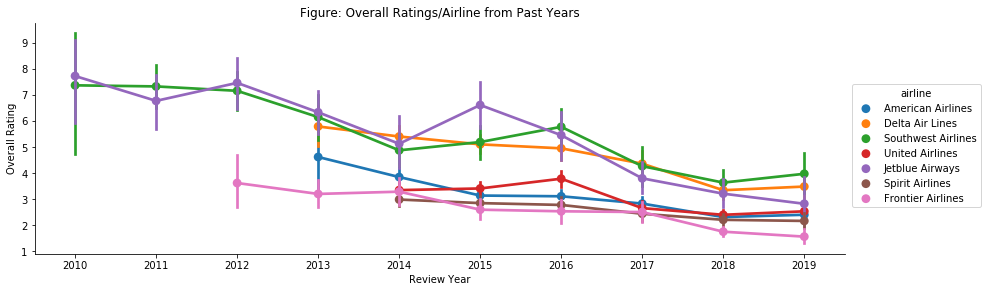

In [48]:
#plt.figure(figsize=(5,5));
sns.factorplot(x='review_year', y='overall',data=df_sky, height=6, aspect=3, hue='airline');
plt.xlabel('Review Year');
plt.ylabel('Overall Rating');
plt.title("Figure: Overall Ratings/Airline from Past Years");

## Customer Recommedation per Airline from Past Years

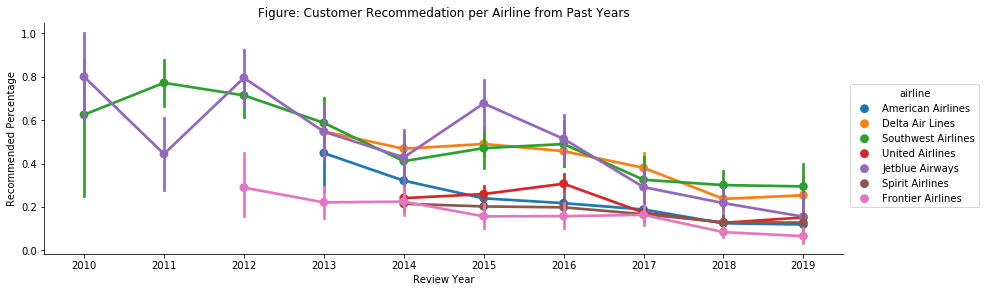

In [49]:
sns.factorplot(x='review_year', y='recommended',data=df_sky, height=6, aspect=3, hue='airline');
plt.xlabel('Review Year');
plt.ylabel('Recommended Percentage');
plt.title("Figure: Customer Recommedation per Airline from Past Years");

## Delta- United- American Airlines Ratings Graphs 

In [50]:
DUA = df_sky[df_sky['airline_no'] <5]
DUA = DUA[DUA['airline_no']!=3]

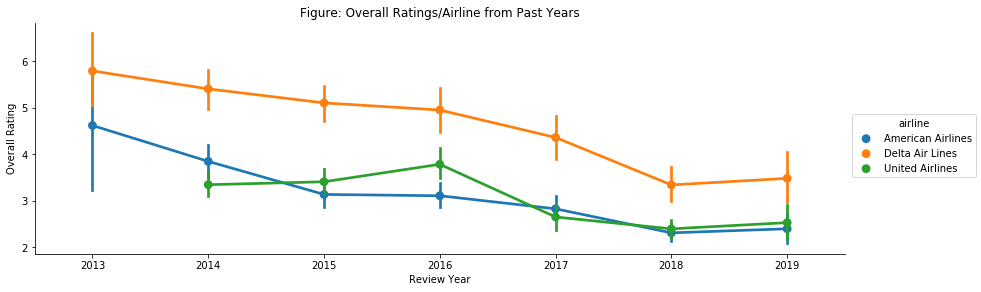

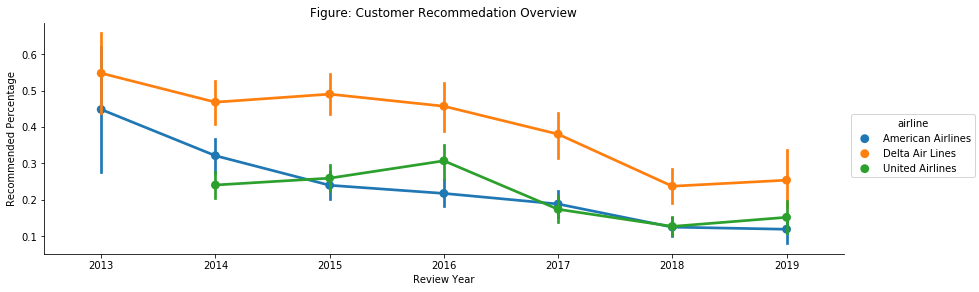

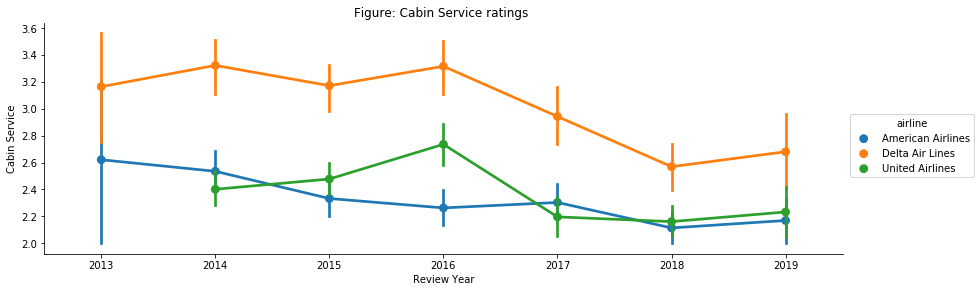

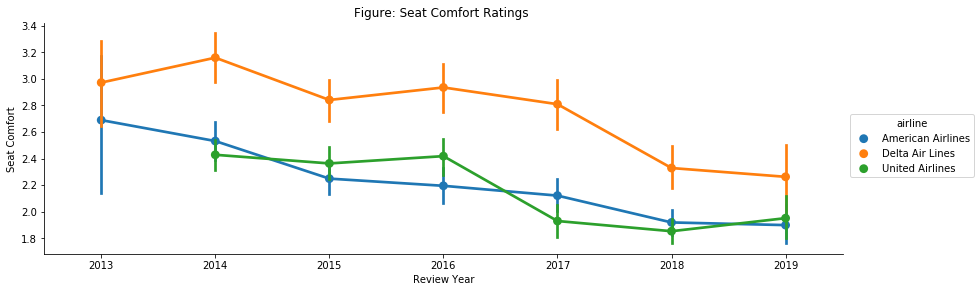

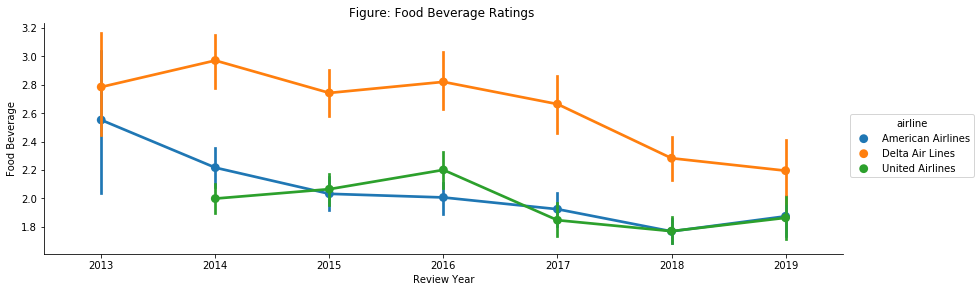

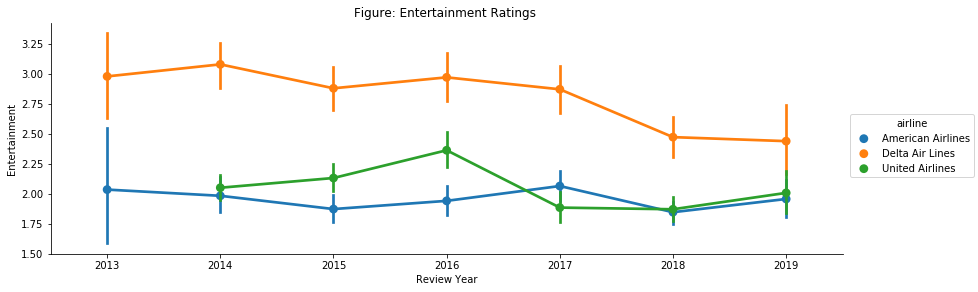

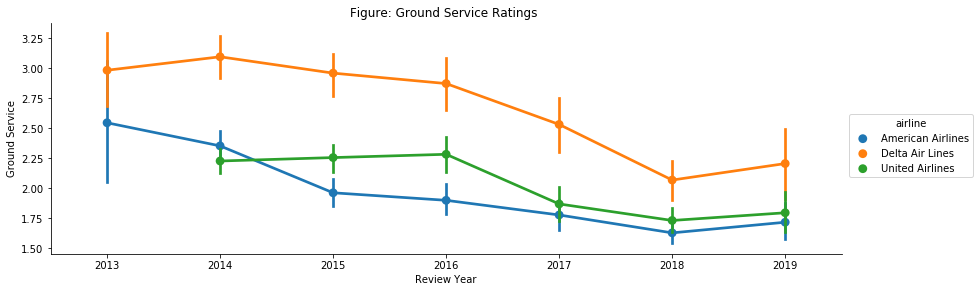

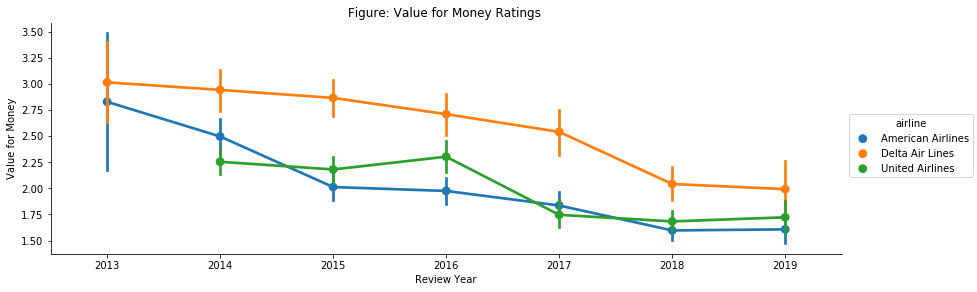

In [51]:
#plt.figure(figsize=(10,15));
sns.factorplot(x='review_year', y='overall', data=DUA , height=6, aspect=3, hue='airline', );
plt.xlabel('Review Year');
plt.ylabel('Overall Rating');
plt.title("Figure: Overall Ratings/Airline from Past Years");

sns.factorplot(x='review_year', y='recommended',data=DUA, height=6, aspect=3, hue='airline');
plt.xlabel('Review Year');
plt.ylabel('Recommended Percentage');
plt.title("Figure: Customer Recommedation Overview");

sns.factorplot(x='review_year', y='cabin_service',data=DUA, height=6, aspect=3, hue='airline');
plt.xlabel('Review Year');
plt.ylabel('Cabin Service');
plt.title("Figure: Cabin Service ratings ");

sns.factorplot(x='review_year', y='seat_comfort',data=DUA, height=6, aspect=3, hue='airline');
plt.xlabel('Review Year');
plt.ylabel('Seat Comfort');
plt.title("Figure: Seat Comfort Ratings ");

sns.factorplot(x='review_year', y='food_bev',data=DUA, height=6, aspect=3, hue='airline');
plt.xlabel('Review Year');
plt.ylabel('Food Beverage');
plt.title("Figure: Food Beverage Ratings ");

sns.factorplot(x='review_year', y='entertainment',data=DUA, height=6, aspect=3, hue='airline');
plt.xlabel('Review Year');
plt.ylabel('Entertainment');
plt.title("Figure: Entertainment Ratings ");

sns.factorplot(x='review_year', y='ground_service',data=DUA, height=6, aspect=3, hue='airline');
plt.xlabel('Review Year');
plt.ylabel('Ground Service');
plt.title("Figure: Ground Service Ratings ");

sns.factorplot(x='review_year', y='value_for_money',data=DUA, height=6, aspect=3, hue='airline');
plt.xlabel('Review Year');
plt.ylabel('Value for Money');
plt.title("Figure: Value for Money Ratings ");

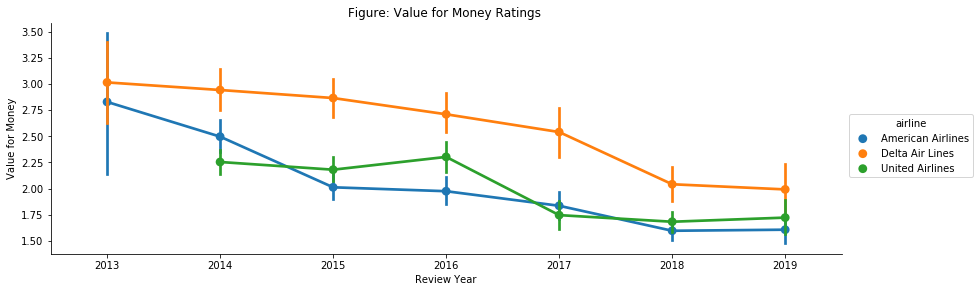

In [52]:
sns.factorplot(x='review_year', y='value_for_money',data=DUA, height=6, aspect=3, hue='airline');
plt.xlabel('Review Year');
plt.ylabel('Value for Money');
plt.title("Figure: Value for Money Ratings ");

In [53]:
DUA.head()

airline                                    customer_review  \
0  American Airlines  âœ… Trip Verified | We were scheduled to fly f...   
1  American Airlines  Not Verified | I had a flight from Dallas to S...   
2  American Airlines  Not Verified | Pittsburgh to Tampa. Every sing...   
3  American Airlines  âœ… Trip Verified | Dallas to Atlanta. You hav...   
4  American Airlines  âœ… Trip Verified | Tampa to Vancouver via Dal...   

   overall  seat_comfort  cabin_service  food_bev  entertainment  \
0      5.0           5.0            5.0       5.0            4.2   
1      1.0           1.0            2.0       2.0            2.0   
2      1.0           1.0            1.0       1.0            1.0   
3      1.0           3.0            2.0       1.0            1.0   
4      3.0           1.0            1.0       1.0            3.0   

   ground_service  value_for_money  review_month  \
0             3.0              3.0             5   
1             1.0              1.0             5   
2             1.0              1.0             5   
3             1.0              1.0             5   
4             1.0              1.0             5   

                         ...                          \
0                        ...                           
1                        ...                           
2                        ...                           
3                        ...                           
4                        ...                           

   traveller_type_Couple Leisure  traveller_type_Family Leisure  \
0                              1                              0   
1                              0                              1   
2                              0                              1   
3                              0                              0   
4                              1                              0   

   traveller_type_Solo Leisure  cabin_Business Class  cabin_Economy Class  \
0                            0                     0                    0   
1                            0                     0                    0   
2                            0                     0                    1   
3                            0                     0                    1   
4                            0                     0                    1   

   cabin_First Class  cabin_Premium Economy  recommended  airline_no  \
0                  1                      0            0           1   
1                  0                      1            0           1   
2                  0                      0            0           1   
3                  0                      0            0           1   
4                  0                      0            0           1   

                                        clean_review  
0   We were scheduled to fly from Miami to Orland...  
1   I had a flight from Dallas to San Diego and i...  
2   Pittsburgh to Tampa. Every single time I try ...  
3   Dallas to Atlanta. You have to love a airline...  
4   Tampa to Vancouver via Dallas. Our first flig...  

[5 rows x 22 columns]

In [54]:
df_all = DUA[['airline','seat_comfort','cabin_service', 'food_bev', 'entertainment', 'ground_service','value_for_money']]


In [55]:
df_all = df_all.groupby('airline').mean().transpose()
df_all

airline          American Airlines  Delta Air Lines  United Airlines
seat_comfort              2.137193         2.747414         2.165429
cabin_service             2.270085         3.011312         2.362672
food_bev                  1.952965         2.635036         1.952651
entertainment             1.930886         2.803318         2.041257
ground_service            1.863772         2.649214         2.034382
value_for_money           1.896756         2.562109         1.992459

In [56]:
df_all = df_all.reset_index()
df_all['category'] = df_all['index']
df_all.drop('index', axis=1, inplace=True)
df_all

airline  American Airlines  Delta Air Lines  United Airlines         category
0                 2.137193         2.747414         2.165429     seat_comfort
1                 2.270085         3.011312         2.362672    cabin_service
2                 1.952965         2.635036         1.952651         food_bev
3                 1.930886         2.803318         2.041257    entertainment
4                 1.863772         2.649214         2.034382   ground_service
5                 1.896756         2.562109         1.992459  value_for_money

In [57]:
df_a = df_all[['category', 'American Airlines']]
df_a.columns = ['category', 'value']
df_a['airline'] = 'American Airline'

df_d = df_all[['category', 'Delta Air Lines']]
df_d.columns = ['category', 'value']
df_d['airline'] = 'Delta Airline'

df_u = df_all[['category', 'United Airlines']]
df_u.columns = ['category', 'value']
df_u['airline'] = 'United Airline'

df = df_a.append(df_d).append(df_u)
df.reset_index(drop=True, inplace=True)

df

category     value           airline
0      seat_comfort  2.137193  American Airline
1     cabin_service  2.270085  American Airline
2          food_bev  1.952965  American Airline
3     entertainment  1.930886  American Airline
4    ground_service  1.863772  American Airline
5   value_for_money  1.896756  American Airline
6      seat_comfort  2.747414     Delta Airline
7     cabin_service  3.011312     Delta Airline
8          food_bev  2.635036     Delta Airline
9     entertainment  2.803318     Delta Airline
10   ground_service  2.649214     Delta Airline
11  value_for_money  2.562109     Delta Airline
12     seat_comfort  2.165429    United Airline
13    cabin_service  2.362672    United Airline
14         food_bev  1.952651    United Airline
15    entertainment  2.041257    United Airline
16   ground_service  2.034382    United Airline
17  value_for_money  1.992459    United Airline

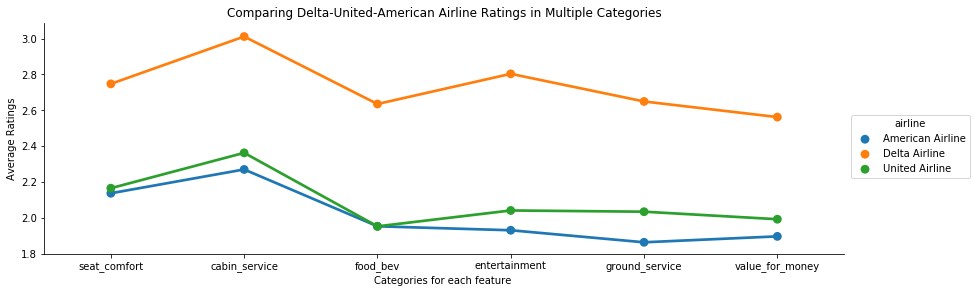

In [58]:
sns.factorplot(x='category', y='value',data=df, height=6, aspect=3, hue='airline');
plt.xlabel('Categories for each feature ');
plt.ylabel('Average Ratings');
plt.title("Comparing Delta-United-American Airline Ratings in Multiple Categories");

## Adding Airline Specific Domain STOPWORDS in list

In [59]:
domain_stopwords = {'airline', 'flight', 'plane', 'airport', 'flights', 'airlines'}
stopwords = set.union(STOPWORDS, domain_stopwords)

## WordClouds 

In [60]:
def show_wordcloud(data, title, f_name):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=80,
        max_font_size=40, 
        scale=4,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    #plt.savefig(f_name, bbox_inches = 'tight');
    plt.show()
    plt.close(fig)


#Data Cleaning

def clean_reviewtext(mytext):
    review_text = str(list(mytext)).lower()
    text = re.sub(r"[^a-zA-Z0-9]", " ", review_text) 
    return text


# Create Cloud
def create_cloud(df, title, f_name):
    text = clean_reviewtext(df['clean_review'])
    show_wordcloud(text, title, f_name)
    #plt.savefig('a_cloud.png', bbox_inches = 'tight');


def generate_cloud(df, var_all=True):
    negative_reviews = df[df['overall'].isin([1,2])]
    neutral_reviews =  df[df['overall'].isin([3])]
    positive_reviews = df[df['overall'].isin([4,5])]

    
    #create_cloud(neutral_reviews,'Neutral Reviews WordCloud with Overall Rating 3', 'neut_cloud.png')



    negative_vectorizer = TfidfVectorizer(stop_words=stopwords, ngram_range=(3, 3), 
                           max_df=1.0, min_df=1, max_features=3000,use_idf=False)
    negative_vectorized = negative_vectorizer.fit_transform(negative_reviews.clean_review)

    positive_vectorizer = TfidfVectorizer(stop_words=stopwords, ngram_range=(3, 3), 
                           max_df=1.0, min_df=1, max_features=3000,use_idf=False)
    positive_vectorized = positive_vectorizer.fit_transform(positive_reviews.clean_review)

    neutral_vectorizer = TfidfVectorizer(stop_words=stopwords, ngram_range=(3, 3), 
                           max_df=1.0, min_df=1, max_features=3000,use_idf=False)
    neutral_vectorized = neutral_vectorizer.fit_transform(neutral_reviews.clean_review)


    #print("negative_vectorized", negative_vectorized.shape)
    #print("positive_vectorized", positive_vectorized.shape)
    #print("neutral_vectorized", neutral_vectorized.shape)
    
    #Most Common Comments from Positive Reviews

    positive_vocab = positive_vectorizer.get_feature_names()
    positive_vectorized_df = pd.DataFrame(positive_vectorized.todense(),columns=[positive_vocab]).sum()
    positive_term_f = positive_vectorized_df.sort_values(ascending=False)
    #print("positive_term_frequency", positive_term_f.head(15))

    #Most Common Comments from Negative Reviews

    negative_vocab = negative_vectorizer.get_feature_names()
    negative_vectorized_df = pd.DataFrame(negative_vectorized.todense(),columns=[negative_vocab]).sum()
    negative_term_f = negative_vectorized_df.sort_values(ascending=False)
    #print("negative_term_frequency", negative_term_f.head(15))


    #Most Common Comments from Neutral Reviews

    neutral_vocab = neutral_vectorizer.get_feature_names()
    neutral_vectorized_df = pd.DataFrame(neutral_vectorized.todense(),columns=[neutral_vocab]).sum()
    neutral_term_f = neutral_vectorized_df.sort_values(ascending=False)
    #print("neutral_term_frequency", neutral_term_f.head(15))

    #Create Visualizations

    df_pos = pd.DataFrame(positive_term_f)
    df_neg = pd.DataFrame(negative_term_f)
    df_neut = pd.DataFrame(neutral_term_f)

    #df_pos.head(10).plot(kind='bar', title='Positive Reviews', );
    #df_neg.head(10).plot(kind='bar', title='Negative Reviews', );

    #fig = plt.figure(figsize=(9, 11));

    #df_neg.head(7).plot(kind='barh', title='Negative Reviews', figsize=(6,4))
    #plt.savefig('plot2.png', bbox_inches = 'tight');
    #plt.close(fig)

    df_pos_top = df_pos.reset_index().head(10)
    df_pos_top.columns = ['content', 'value']
    #df_pos_top.plot(x='content', kind='barh', title='Positive Reviews', figsize=(6,4), color='green')
    #plt.xlabel('Frequency')
    #plt.ylabel('Most Frequent Context')
    #plt.savefig('plot1.png', bbox_inches = 'tight');
    #plt.close(fig)



    df_neg_top = df_neg.reset_index().head(10)
    df_neg_top.columns = ['content', 'value']
    #df_neg_top.plot(x='content', kind='barh', title='Negative Reviews', figsize=(6,4), color='red')
    #plt.xlabel('Frequency')
    #plt.ylabel('Most Frequent Context')
    #plt.savefig('plot2.png', bbox_inches = 'tight');


    df_neut_top = df_neut.reset_index().head(10)
    df_neut_top.columns = ['content', 'value']
    #df_neut_top.plot(x='content', kind='barh', title='Neutral Reviews', figsize=(6,4), color='orange')
    #plt.xlabel('Frequency')
    #plt.ylabel('Most Frequent Context')
    #plt.savefig('plot1.png', bbox_inches = 'tight');
    #plt.close(fig)
    
    if var_all == True:
    
        total3_vectorizer = TfidfVectorizer(stop_words=stopwords, ngram_range=(3, 3), 
                               max_df=1.0, min_df=1, max_features=2000,use_idf=False)
        total3_vectorized = total3_vectorizer.fit_transform(df_sky.clean_review)
        print("total3_vectorized", total3_vectorized.shape)

        #Most Common Comments from All Reviews

        total3_vocab = total3_vectorizer.get_feature_names()
        total3_vectorized_df = pd.DataFrame(total3_vectorized.todense(),columns=[total3_vocab]).sum()
        total3_term_f = total3_vectorized_df.sort_values(ascending=False)
        #print("total3_term_frequency", total3_term_f.head(30))


        df_total = pd.DataFrame(total3_term_f.head(15))
        df_total.reset_index(inplace=True)
        df_total.columns = ['labels', 'values']


        #cnt_srs = df_total.head()
        trace = go.Bar(
            y=df_total['labels'],
            x=df_total['values'],
            orientation = 'h',
            marker=dict(
                color='#8A360F',
                colorscale = 'Blues',
                reversescale = True
            )
        )

        layout = dict(
            title='Most Frequently used Three-Words Combination in Customer Reviews',
            margin=dict(
            l=300,
        )
            )
        data = [trace]
        fig = go.Figure(data=data, layout=layout)
        py.offline.iplot(fig)
    
    
    
    
    trace1 = go.Bar(
        y=df_pos_top.content,
        x=df_pos_top.value,
        orientation = 'h',
        name = 'positive'
    )
    trace2 = go.Bar(
        y=df_neg_top.content,
        x=df_neg_top.value,
        orientation = 'h',
        name = 'negative'
    )

    fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('Positive Frequent Terms of 3-words Combination', 
                                                              'Negative Frequent Terms of 3-words Combination'))


    fig.append_trace(trace1, 1, 1)
    fig.append_trace(trace2, 1, 2)
    fig['layout'].update(height=400, width=1450, title='Most Frequent 3-words Combination', margin=dict(l=100,))
    py.offline.iplot(fig, filename='simple-subplot')
    
    
    

    create_cloud(positive_reviews, 'Positive Reviews WordCloud with Overall Rating 4 or 5', 'pos_cloud.png')
    create_cloud(negative_reviews,'Negative Reviews WordCloud with Overall Rating 1 or 2', 'neg_cloud.png')


## Generating Word Cloud On all customer_review data

total3_vectorized (13359, 2000)


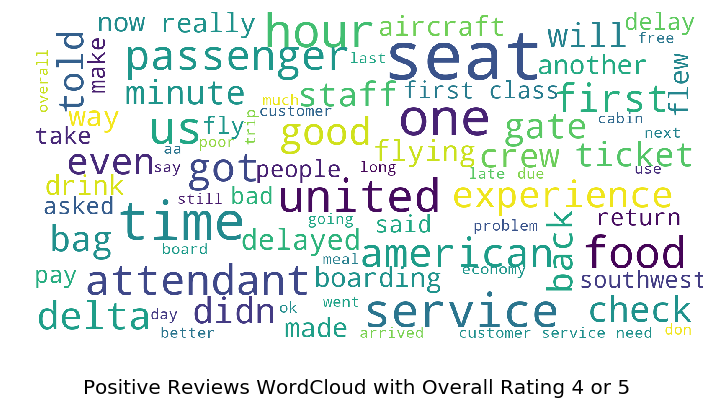

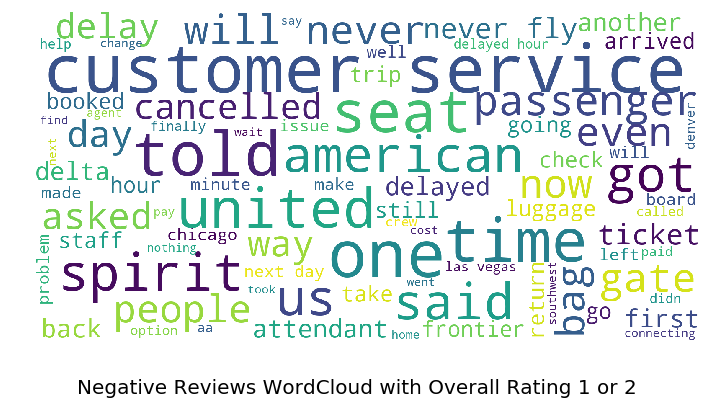

In [61]:
generate_cloud(df_sky)

## Delta Airline Word Cloud and Most Frequent Words

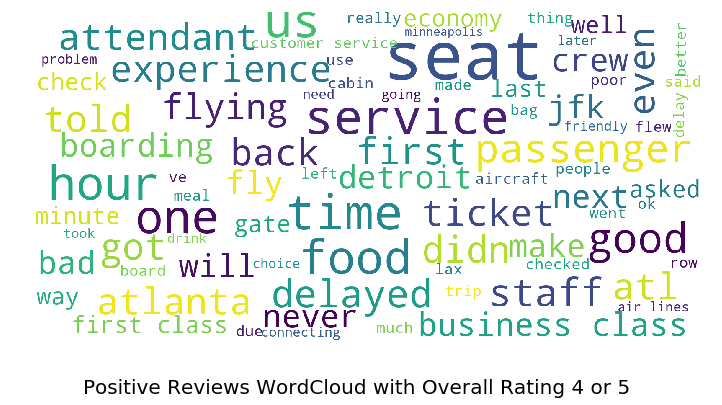

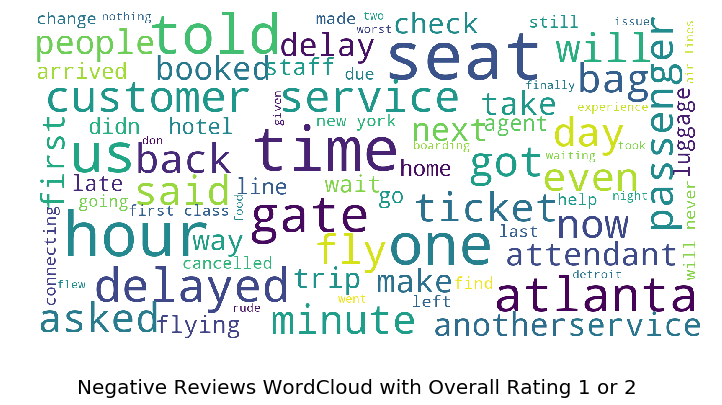

In [62]:
domain_stopwords = {'airline', 'flight', 'plane', 'airport', 'flights', 'airlines', 'delta'}
stopwords = set.union(STOPWORDS, domain_stopwords)

generate_cloud(DUA[DUA['airline_no']==2], False)


## Generating Word Cloud Only United Airlines customer_review data

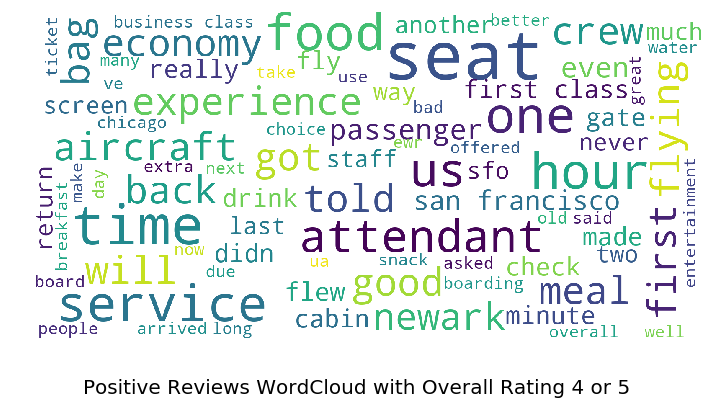

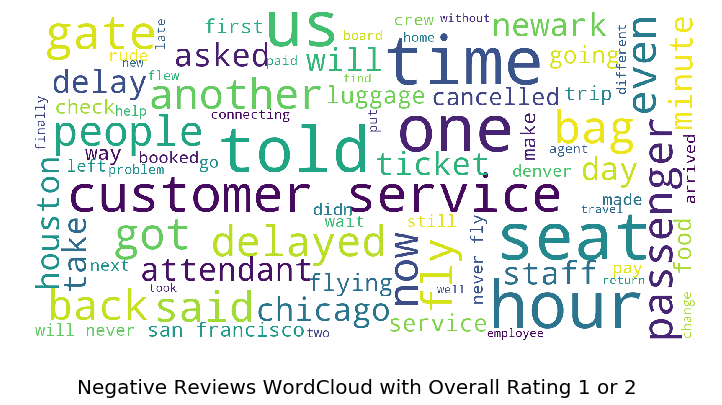

In [63]:
domain_stopwords = {'airline', 'flight', 'plane', 'airport', 'flights', 'airlines', 'united'}
stopwords = set.union(STOPWORDS, domain_stopwords)

generate_cloud(DUA[DUA['airline_no']==4], False)

## Generating Word Cloud Only American Airlines customer_review data

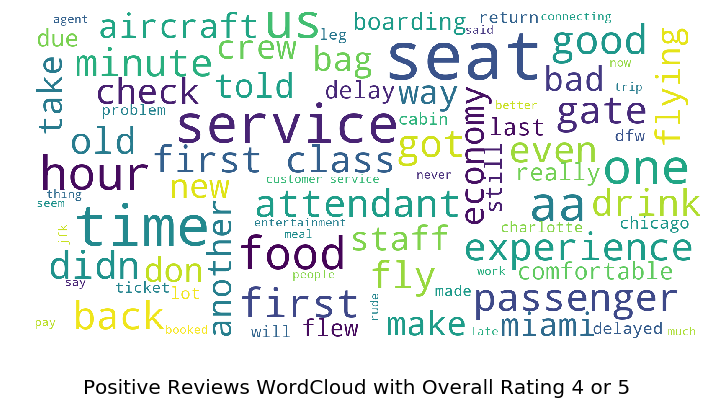

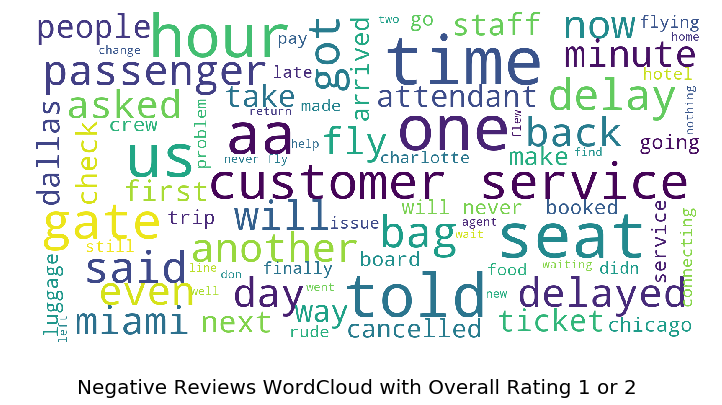

In [64]:
domain_stopwords = {'airline', 'flight', 'plane', 'airport', 'flights', 'airlines', 'american'}
stopwords = set.union(STOPWORDS, domain_stopwords)

generate_cloud(DUA[DUA['airline_no']==1], False)


In [65]:
df_corr = pd.DataFrame(df_sky.drop('airline_no', axis=1).corr().head(1).transpose()['overall'].sort_values(ascending=False))
df_corr.columns = ['correlation']

In [66]:
var_title = "Correlation of All Features with 'Overall' Feature "
var_x = df_corr.index[1:]
var_y = df_corr.correlation[1:]
var_xticks='Features'
var_yticks='Correlation % with Overall Feature'
var_filename='feat_corr'
var_color='red'
var_opacity=0.8
draw_barchart(var_x,var_y,var_xticks, var_yticks, var_title, var_filename, var_color, var_opacity)

In [67]:
df_sky = df_sky[['airline', 'customer_review', 'clean_review', 'airline_no', 'overall', 'seat_comfort',
       'cabin_service', 'food_bev', 'entertainment', 'ground_service',
       'value_for_money', 'review_month', 'review_year',
       'traveller_type_Business', 'traveller_type_Couple Leisure',
       'traveller_type_Family Leisure', 'traveller_type_Solo Leisure',
       'cabin_Business Class', 'cabin_Economy Class', 'cabin_First Class',
       'cabin_Premium Economy', 'recommended']]

# Data Cleaning completed and file stored in csv format
df_sky.to_csv('Skytrax_Modified.csv', index=False)



# End Here - Rough Work Below

In [68]:
# Getting data in SQL form

# connect to the database
#conn = sqlite3.connect('population_data.db')

# run a query
#pd.read_sql('SELECT * FROM population_data', conn)

# Fixing overall rating values

#working_df.to_sql('data', connection,index=False, if_exists='append')


#skytrax.to_sql('skytrax_data', connection, index=False, if_exists='replace')

#pd.read_sql("SELECT count(1) FROM skytrax_data where overall == 5", sql_engine)